# In-Class Quiz Nº 4

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Rodrigo Dias
## Number: 45881

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q4.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
import pickle
from tensorflow.keras import models
from tensorflow.keras import layers
# for those who have the GPU enable, maybe uncomment the next lines
# gp = tf.config.list_physical_devices('GPU')
# print(gp)
# tf.config.experimental.set_memory_growth(gp[0], True)

# load data
D = pickle.load(open('kMNISTsmall.p', 'rb'))
X1 = D.X1
X2 = D.X2
y1 = D.y1
y2 = D.y2

print(X1.shape, X2.shape)
print(y1.shape, y2.shape)


(10000, 28, 28) (5000, 28, 28)
(10000,) (5000,)


# Question 1: 
##  Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
## - Use 6 convolutional layers
## - Use 3 pooling layers
## - DO NOT use data augmentation
## - Obtain in the test set an accuracy equal or above 90%
###  Build this network, compile and train the network using the kMNIST training set. Also include the test data as the validation set during training.
###  Plot the  the losses and the accuracies curves for the training and validation sets during the training process.  Comment the results. Print the total number of errors and the confusion matrix for the test dataset.

In [33]:
X1 = X1.reshape(-1, 28, 28, 1) / 255.
X2 = X2.reshape(-1, 28, 28, 1) / 255.

Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

print(X1.shape, X2.shape, Y1.shape, Y2.shape)

cnn = models.Sequential()

cnn.add(layers.Conv2D(16, (5, 5), activation='relu',
                      input_shape=(28, 28, 1), padding="same"))
cnn.add(layers.Conv2D(16, (5, 5), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn.add(layers.Conv2D(64, (5, 5), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))
cnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
cnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(96, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()

cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


(10000, 28, 28, 1) (5000, 28, 28, 1) (10000, 10) (5000, 10)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 16)        6416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          25664     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)          102464    
_________________________________________________________________
average_pooling2d_8 (Average (None, 2, 2, 64)          0         
____________________________________________________________

Epoch 1/20
79/79 [==============================] - 14s 172ms/step - loss: 1.5511 - accuracy: 0.4654 - val_loss: 1.8315 - val_accuracy: 0.4318
Epoch 2/20
79/79 [==============================] - 13s 170ms/step - loss: 0.7183 - accuracy: 0.7706 - val_loss: 2.1003 - val_accuracy: 0.4864
Epoch 3/20
79/79 [==============================] - 15s 188ms/step - loss: 0.4767 - accuracy: 0.8509 - val_loss: 1.2303 - val_accuracy: 0.6392
Epoch 4/20
79/79 [==============================] - 15s 192ms/step - loss: 0.3319 - accuracy: 0.8957 - val_loss: 1.2916 - val_accuracy: 0.6550
Epoch 5/20
79/79 [==============================] - 14s 174ms/step - loss: 0.2686 - accuracy: 0.9180 - val_loss: 2.1672 - val_accuracy: 0.5462
Epoch 6/20
79/79 [==============================] - 14s 176ms/step - loss: 0.2789 - accuracy: 0.9201 - val_loss: 0.5177 - val_accuracy: 0.8400
Epoch 7/20
79/79 [==============================] - 14s 179ms/step - loss: 0.1632 - accuracy: 0.9490 - val_loss: 0.8129 - val_accuracy: 0.7704

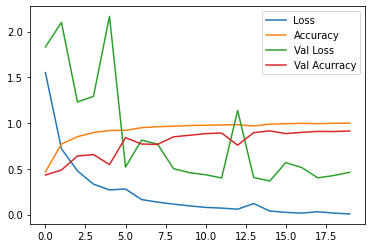

In [34]:
log = cnn.fit(X1, Y1,
              epochs=20,
              batch_size=128,
              validation_data=(X2, Y2),
              use_multiprocessing=True,
              )

h = log.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Acurracy')
plt.legend()
plt.show()


# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the kMNIST dataset. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Pre-process the data so it can be used by the network.
### c)  Train the network for 25 epochs and show the results. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [35]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

D = pickle.load(open('kMNISTverysmall.p', 'rb'))
X1 = D.X1
X2 = D.X2
y1 = D.y1
y2 = D.y2

print(X1.shape, X2.shape)
print(y1.shape, y2.shape)


(5000, 28, 28) (2500, 28, 28)
(5000,) (2500,)


## 2.a)

In [36]:
CNN = MobileNetV2(weights='imagenet',
                  input_shape=(96, 96, 3),
                  include_top=False)

CNN.trainable = False

CNN.summary()

cnn = models.Sequential()
cnn.add(CNN)
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()

cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

## 2.b)

In [37]:
from skimage.color import gray2rgb

X1 = gray2rgb(X1)
X2 = gray2rgb(X2)

X1 = X1.reshape(-1, 28, 28, 3) / 255.
X2 = X2.reshape(-1, 28, 28, 3) / 255.

Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

print(X1.shape, X2.shape, Y1.shape, Y2.shape)

X1 = tf.image.resize(X1, (96, 96))
X2 = tf.image.resize(X2, (96, 96))

X1 = preprocess_input(X1)
X2 = preprocess_input(X2)

print(X1.shape, X2.shape)


(5000, 28, 28, 3) (2500, 28, 28, 3) (5000, 10) (2500, 10)
(5000, 96, 96, 3) (2500, 96, 96, 3)


## 2.c)

Epoch 1/25
40/40 [==============================] - 31s 773ms/step - loss: 2.7605 - accuracy: 0.1118 - val_loss: 4.0775 - val_accuracy: 0.1420
Epoch 2/25
40/40 [==============================] - 34s 854ms/step - loss: 2.6974 - accuracy: 0.1422 - val_loss: 3.8287 - val_accuracy: 0.1000
Epoch 3/25
40/40 [==============================] - 31s 780ms/step - loss: 2.6363 - accuracy: 0.1676 - val_loss: 4.1147 - val_accuracy: 0.1380
Epoch 4/25
40/40 [==============================] - 34s 849ms/step - loss: 2.5989 - accuracy: 0.1820 - val_loss: 3.3015 - val_accuracy: 0.1600
Epoch 5/25
40/40 [==============================] - 32s 793ms/step - loss: 2.3216 - accuracy: 0.2236 - val_loss: 3.7236 - val_accuracy: 0.1216
Epoch 6/25
40/40 [==============================] - 30s 741ms/step - loss: 2.2293 - accuracy: 0.2730 - val_loss: 3.7638 - val_accuracy: 0.1416
Epoch 7/25
40/40 [==============================] - 29s 735ms/step - loss: 2.3149 - accuracy: 0.2556 - val_loss: 3.6616 - val_accuracy: 0.1440

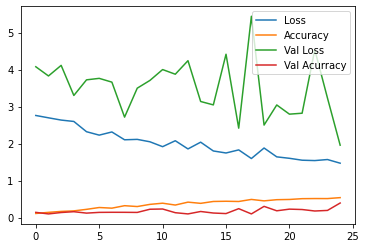

In [38]:
log = cnn.fit(X1, Y1,
              epochs=25,
              batch_size=128,
              validation_data=(X2, Y2),
              use_multiprocessing=True)

h = log.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Acurracy')
plt.legend()
plt.show()


<hr style="border:2px solid black"> </hr>

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsSmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 1000 images of cats and 1000 images of dogs
## The test data consists of 500 images of cats and 500 images of dogs
## The images have various sizes

# Question 3:
## Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
### a)  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN.
### b)  Using the $\texttt{ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation. Note: rescale the generated images so that its pixel values are between 0 and 255.
### c)  Train the network for 25 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the $\texttt{steps_per_epoch}$ and the $\texttt{validation_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.

## 3.a)

In [39]:
cnn = models.Sequential()
cnn.add(CNN)
cnn.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation="relu"))
cnn.add(layers.Dropout(.4))
cnn.add(layers.Dense(5, activation="softmax"))

cnn.summary()

cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Model)  (None, 3, 3, 1280)        2257984   
_________________________________________________________________
average_pooling2d_10 (Averag (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               163968    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 645       
Total params: 2,422,597
Trainable params: 164,613
Non-trainable params: 2,257,984
______________________________________

## 3.b)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dir = './CatsDogsVerySmall/'

dataGen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode="nearest")

trainGen = dataGen.flow_from_directory(directory=dir + "train/",
                                       target_size=(96, 96),
                                       class_mode="categorical",
                                       batch_size=32)

testGen = dataGen.flow_from_directory(directory=dir + "test/",
                                      target_size=(96, 96),
                                      class_mode="categorical",
                                      batch_size=32)

print(trainGen.image_shape, trainGen.class_indices)
print(trainGen.class_indices, trainGen.class_indices)
print(trainGen.samples, testGen.samples)
print(trainGen.batch_size, testGen.batch_size)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(96, 96, 3) {'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1} {'cats': 0, 'dogs': 1}
2000 1000
32 32


## 3.c)

In [41]:
log = cnn.fit(trainGen,
              epochs=25,
              steps_per_epoch=32,
              validation_steps=32,
              validation_data=testGen)

h = log.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["accuracy"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_accuracy"], label='Val Acurracy')
plt.legend()
plt.show()


Epoch 1/25


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,5] labels_size=[32,2]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at C:\Users\Kiko\AppData\Local\Temp\ipykernel_165404\3477855251.py:5) ]] [Op:__inference_train_function_98639]

Function call stack:
train_function
